In [12]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

## Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
"""
## Feature Scaliing

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1,1))


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

## data가 linear하지 않기 때문에 linear kernel대신 다른 걸 쓴다.

y_pred = regressor.predict(sc_X.transform(np.array(6.5).reshape(-1,1)))
print(y_pred) ##scaled된거를 풀어줘야한다.

y_pred2 = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array(6.5).reshape(-1,1))))
print(y_pred2)
#Predicting a new result

[-0.27861589]
[170370.0204065]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


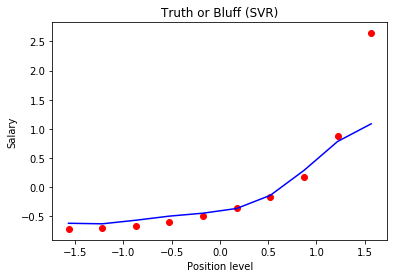

In [14]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 얘는 흔하지 않은 모델이기 때문에 모델안에 feature scailing이 
## 들어가 있지 않다.... 헷갈리넹



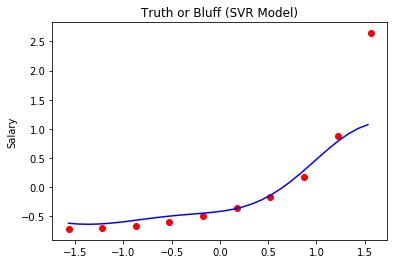

In [18]:
## smooth the curve
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid, regressor.predict(X_grid),color='blue')
plt.title('Truth or Bluff (SVR Model)')
plt.ylabel('Salary')
plt.show()